In [238]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path
import sys 

project_root = Path().cwd()
scripts_dir = project_root / "src" / "scripts"
sys.path.insert(0, str(scripts_dir))

import numpy as np 
import scipy.stats as stats
import scipy.io as io
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
import process_2p as p2p
import lick_behav_analysis as behav

#Recording parameters
fps = 15
framespertrial = 375 
ms_per_frame = int(1000//fps)
reward_frame = 150
cue_frame = 105
trials = 30
cmap= "coolwarm"

In [268]:
path = '/Users/savani/Downloads/2p_data/GLP6_FastedNoCues_L180_P815_600um-_-03092024-1421-084/suite2p/plane0'
# path = '/Users/savani/Downloads/2p_data/GLP6_FastedNoCues_L180_P815_600um-_-03092024-1421-084/suite2p_manual'
matfile = '/Users/savani/Downloads/2p_data/GLP6_FastedNoCues_L180_P815_600um-_-03092024-1421-084/GLP-6_fastedNocue_030924_0_6000_240309-155102.mat'

In [269]:
# Load data
f, iscell, ops = p2p.load_s2p_data(path)
filt_f = p2p.filter_cells(f, iscell)
filt_f_reshaped = p2p.reshape_data(filt_f)
filt_f_norm = p2p.normalize_data(filt_f_reshaped)

# Process behavior data
bout_start, bout_end, bout_start_frames, bout_end_frames = behav.og_lickprocessing(matfile)
successful_trial_idx = [i for i, x in enumerate(bout_start) if (x > 0) & (x < 5000)]
successful_bout_start_frames = bout_start_frames[successful_trial_idx]

# Combine lick data with imaging data
successful_filt_f = filt_f_norm[:, successful_trial_idx, :]  
filt_f_aligned = p2p.align_2p_to_licks(successful_filt_f, successful_bout_start_frames)

# Get baseline data
baseline_data = p2p.get_baseline_filt_f(successful_filt_f)

# Average across trials
avg_f = p2p.average_trials(filt_f_aligned)

Text(0.5, 1.0, '/Users/savani/Downloads/2p_data/GLP6_FastedNoCues_L180_P815_600um-_-03092024-1421-084/suite2p/plane0')

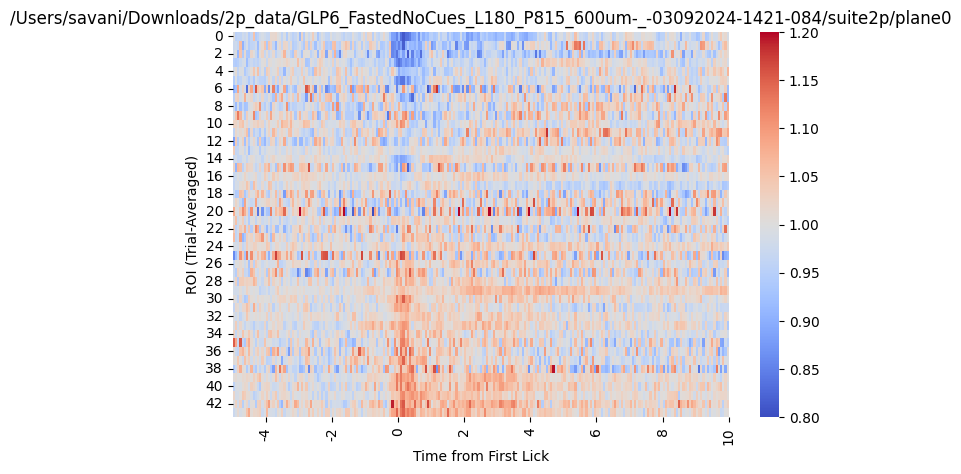

In [270]:
#Plot all cells in heatmap aligned to first lick in lick bout after reward
fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(avg_f[:, 75:105], axis=1))
sorted_avg_mean = avg_f[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap='coolwarm')
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_title(f"{path}")



Text(0.5, 1.0, '/Users/savani/Downloads/2p_data/GLP6_FastedNoCues_L180_P815_600um-_-03092024-1421-084/suite2p/plane0')

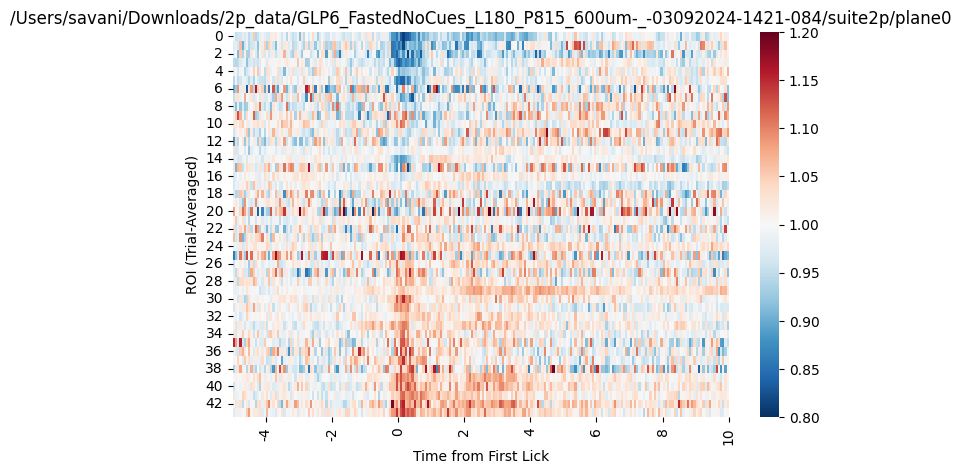

In [271]:
#Plot all cells in heatmap aligned to first lick in lick bout after reward
fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(avg_f[:, 75:105], axis=1))
sorted_avg_mean = avg_f[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap='RdBu_r')
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_title(f"{path}")



Text(0.5, 1.0, '/Users/savani/Downloads/2p_data/GLP6_FastedNoCues_L180_P815_600um-_-03092024-1421-084/suite2p/plane0')

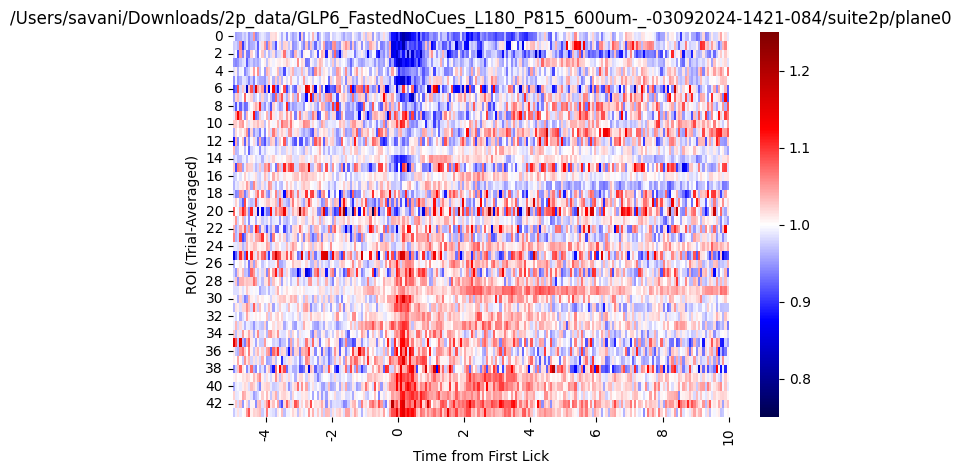

In [272]:
#Plot all cells in heatmap aligned to first lick in lick bout after reward
fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(avg_f[:, 75:105], axis=1))
sorted_avg_mean = avg_f[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.75, vmax=1.25, cmap='seismic')
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_title(f"{path}")



Text(0.5, 1.0, '/Users/savani/Downloads/2p_data/GLP6_FastedNoCues_L180_P815_600um-_-03092024-1421-084/suite2p/plane0')

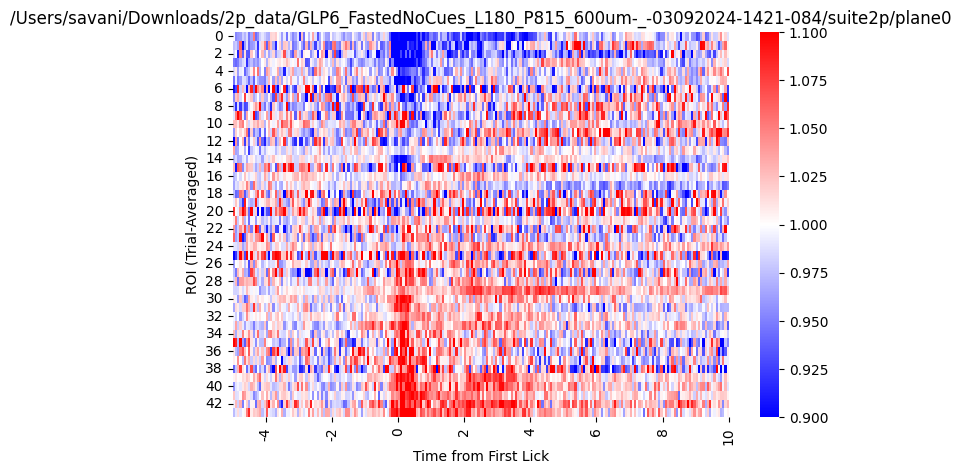

In [258]:
#Plot all cells in heatmap aligned to first lick in lick bout after reward
fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(avg_f[:, 75:105], axis=1))
sorted_avg_mean = avg_f[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.9, vmax=1.1, cmap='bwr')
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_title(f"{path}")



Text(0.5, 1.0, '/Users/savani/Downloads/2p_data/GLP6_FastedNoCues_L180_P815_600um-_-03092024-1421-084/suite2p/plane0')

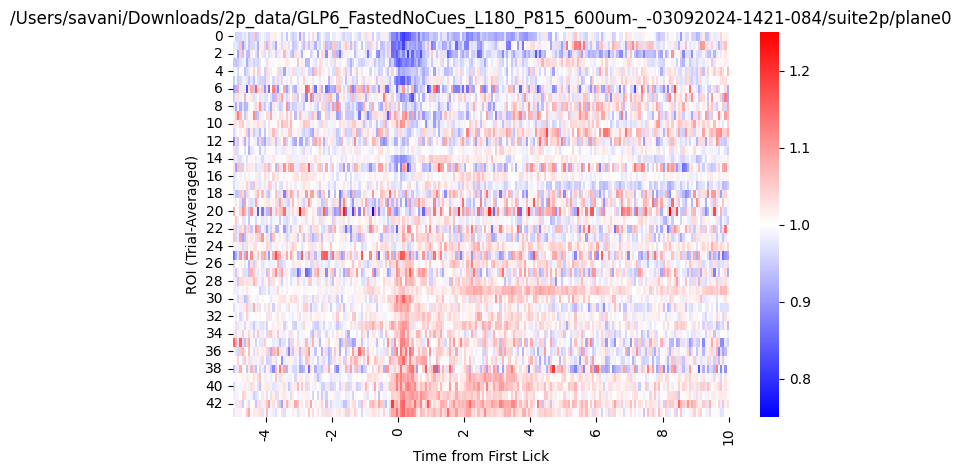

In [ ]:
#Plot all cells in heatmap aligned to first lick in lick bout after reward
fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(avg_f[:, 75:105], axis=1))
sorted_avg_mean = avg_f[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.75, vmax=1.25, cmap='bwr')
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_title(f"{path}")



Text(0.5, 1.0, '/Users/savani/Downloads/2p_data/GLP6_FastedNoCues_L180_P815_600um-_-03092024-1421-084/suite2p/plane0')

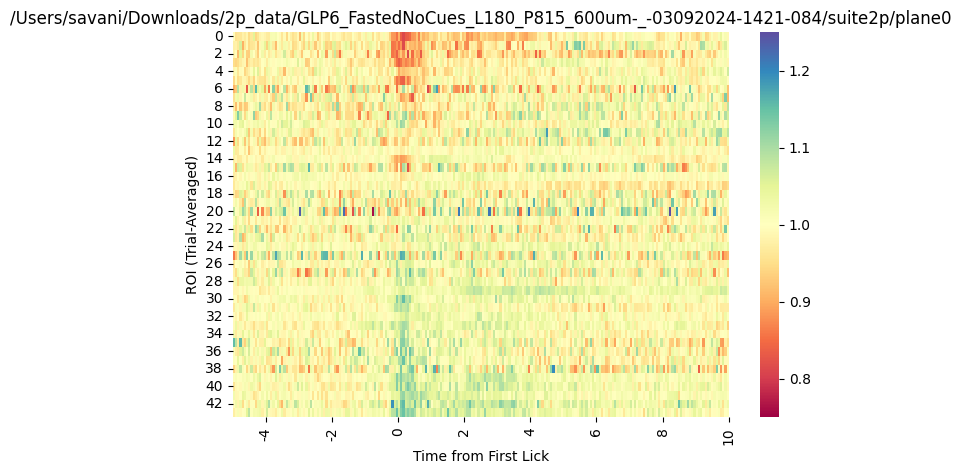

In [274]:
#Plot all cells in heatmap aligned to first lick in lick bout after reward
fig, ax = plt.subplots(1, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(avg_f[:, 75:105], axis=1))
sorted_avg_mean = avg_f[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.75, vmax=1.25, cmap='Spectral')
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_title(f"{path}")



Text(-0.55, 0.96, 'First Lick')

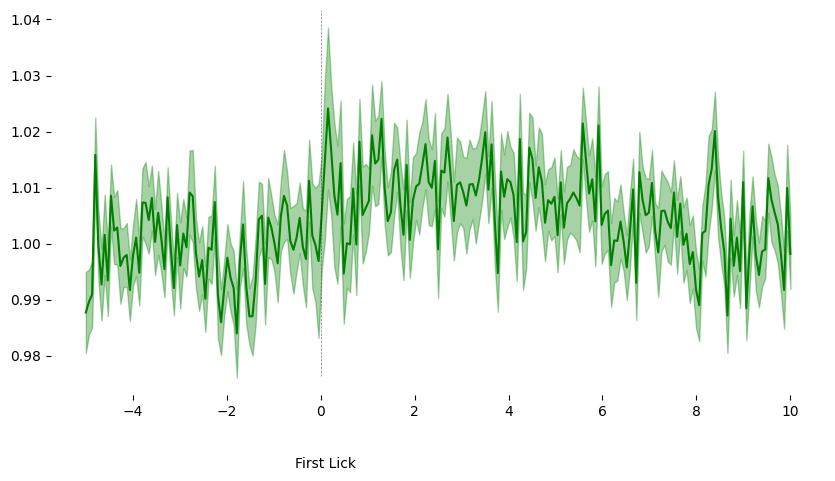

In [256]:
fig, ax = plt.subplots(1, figsize=(10, 5))
time = np.linspace(-5, 10, num=225)
avg_response = np.nanmean(avg_f, axis = 0)
sem_response = stats.sem(avg_f, axis = 0)
ax.plot(time, avg_response, color = 'green')
ax.fill_between(time, avg_response - sem_response, avg_response + sem_response, color = 'green', alpha = 0.35)
sns.despine(left=True, bottom=True)
# sb = add_scalebar(ax, matchx=False, sizex=5, labelx='5 seconds', matchy=False, sep=4, sizey=0.05, labely='5% dF/F',loc='lower left', bbox_to_anchor=(10, 1, 0.1, 0.4))
ax.axvline(0, ymin=0.05, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
ax.text(-0.55, 0.96, 'First Lick')

/var/folders/0b/00sxp7js3s12st9d5np366540000gn/T/ipykernel_91637/2799163078.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, figsize=(8, 5))


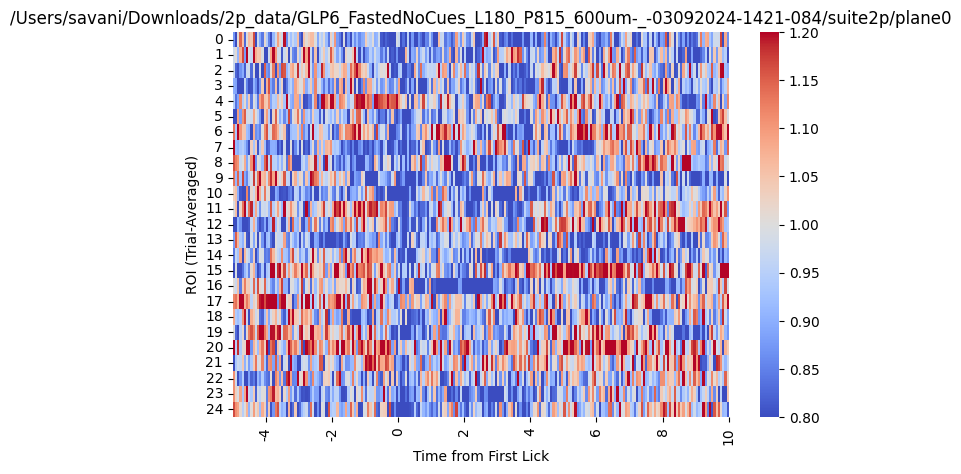

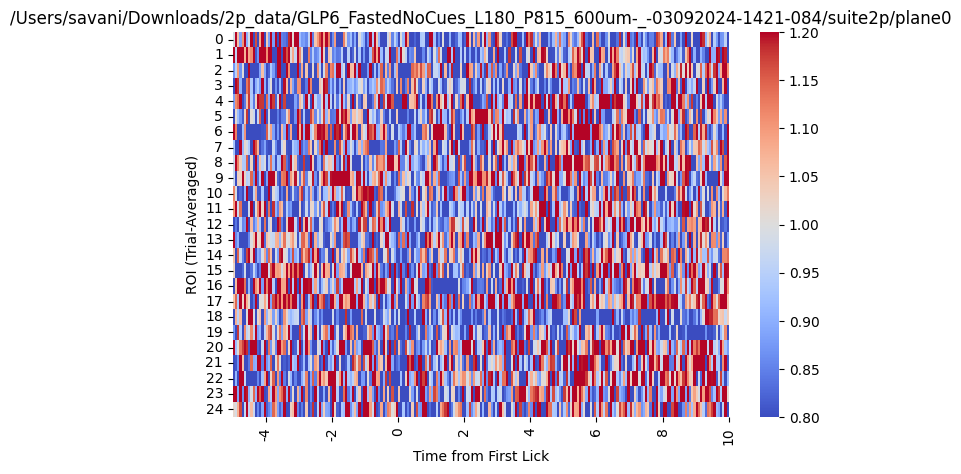

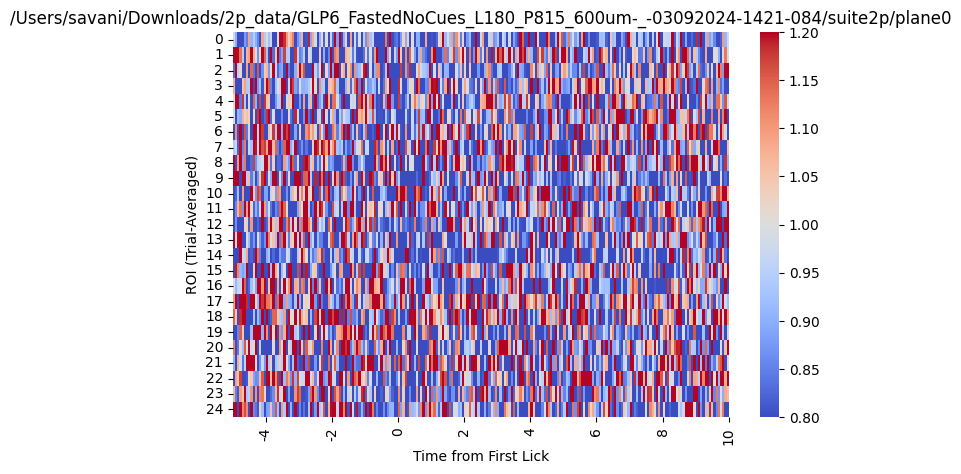

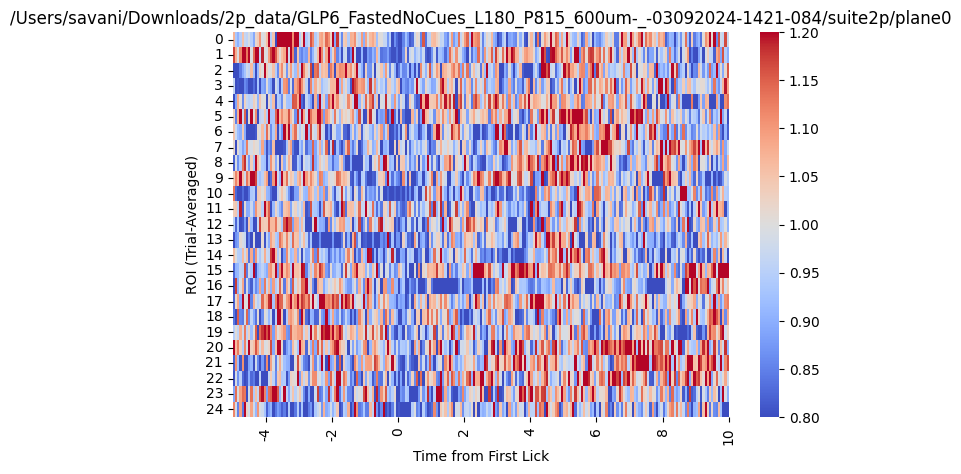

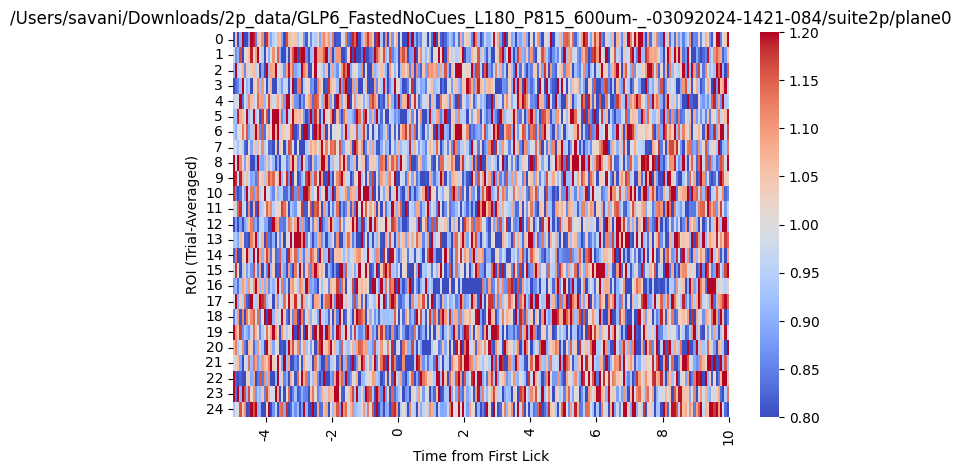

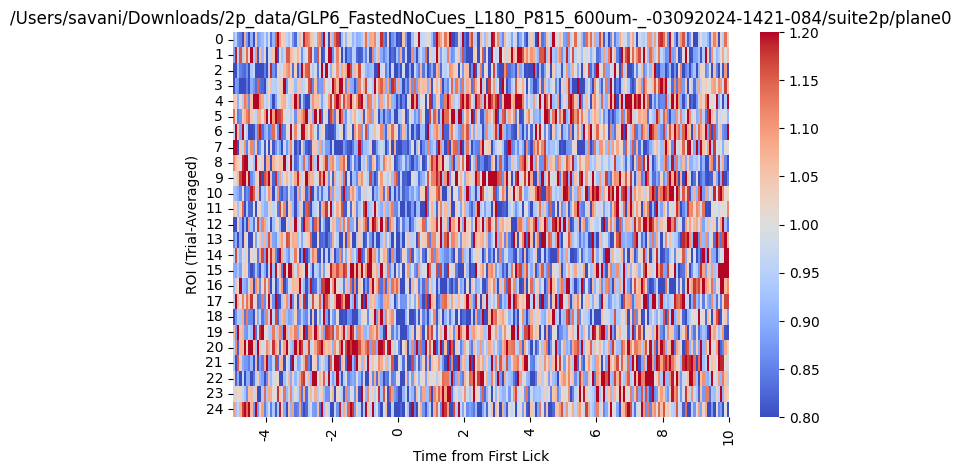

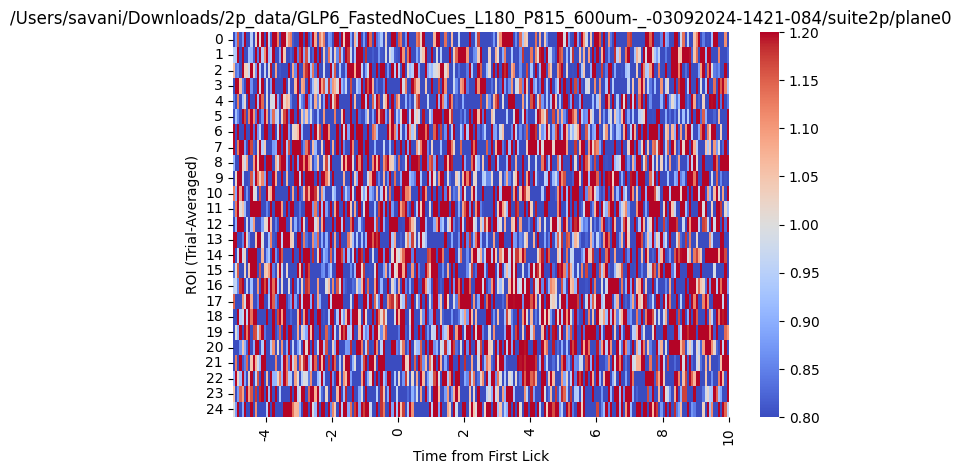

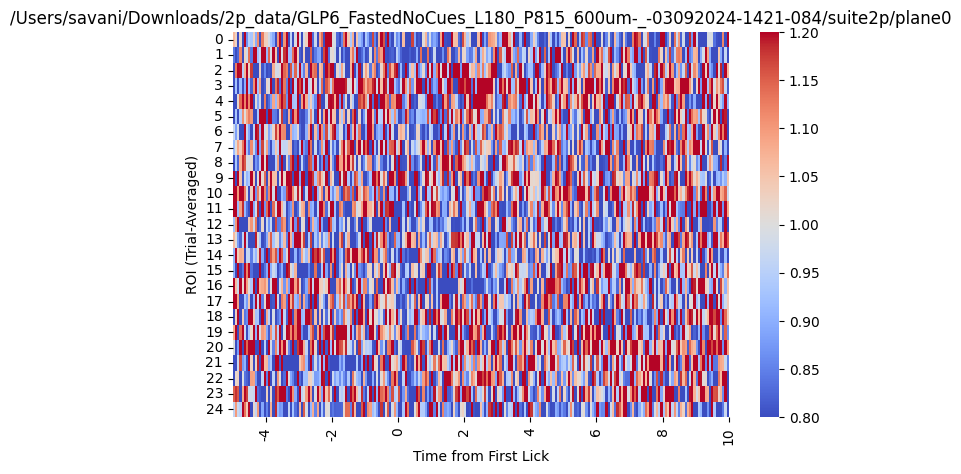

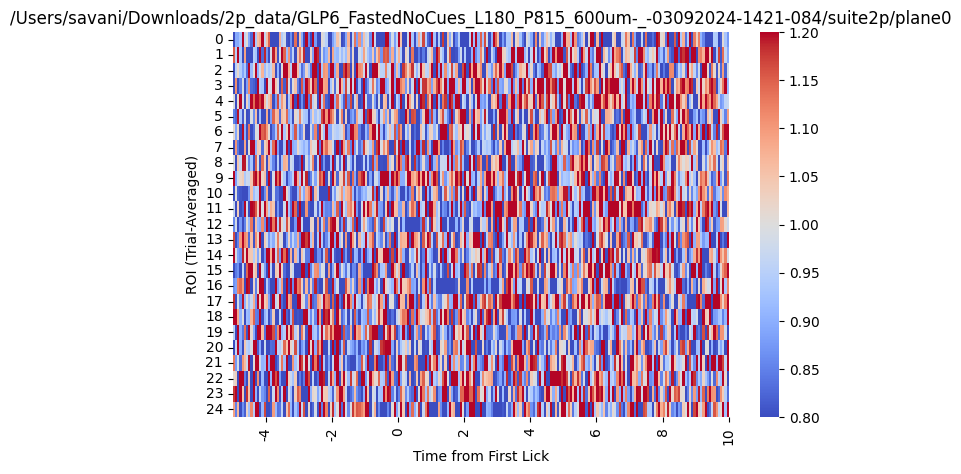

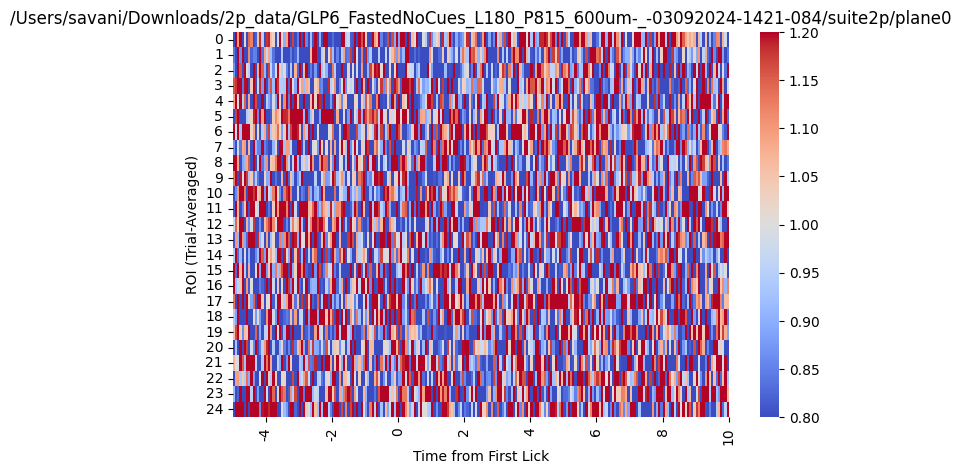

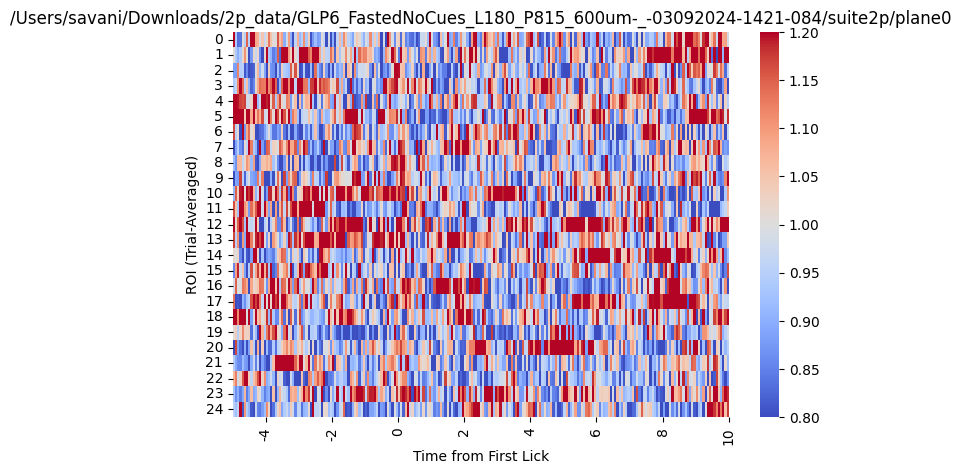

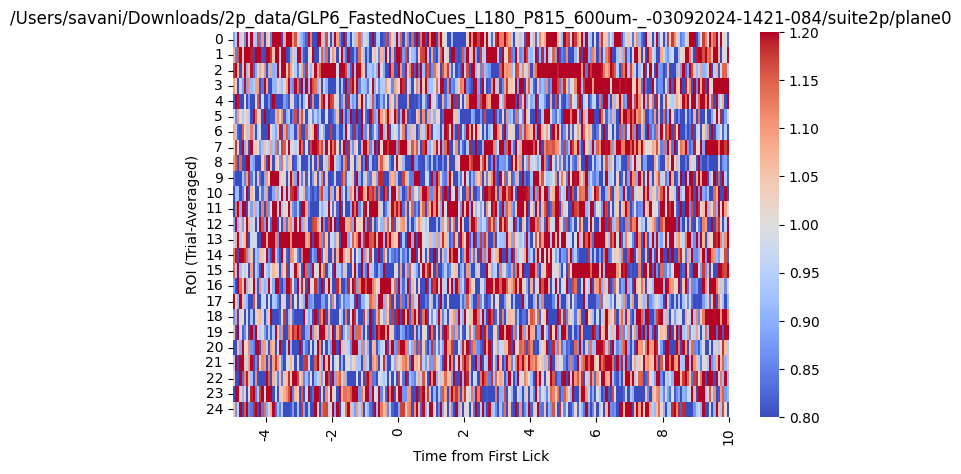

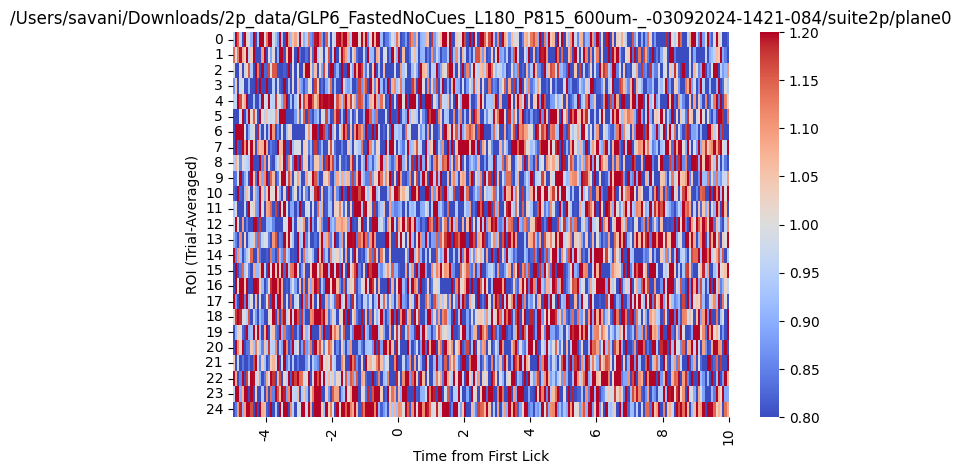

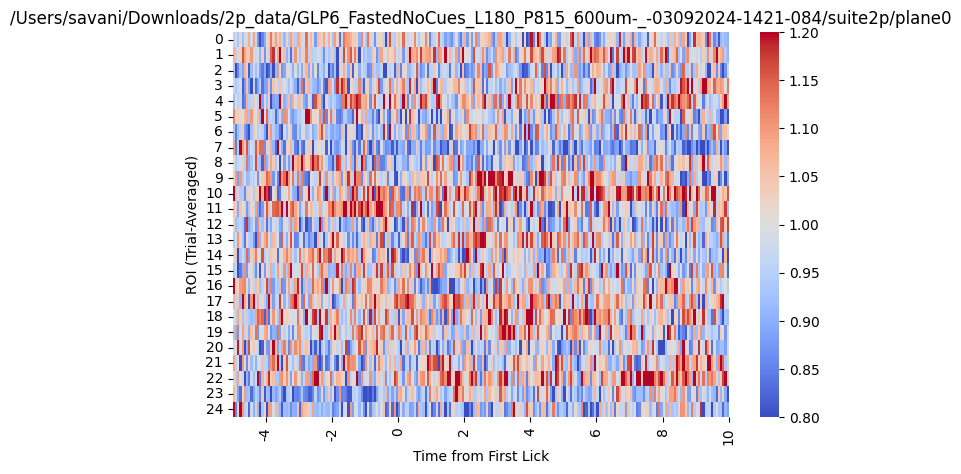

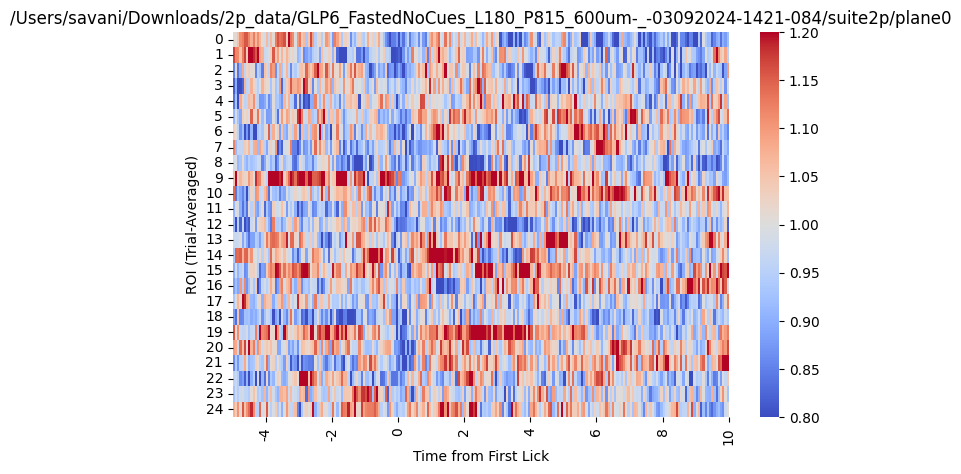

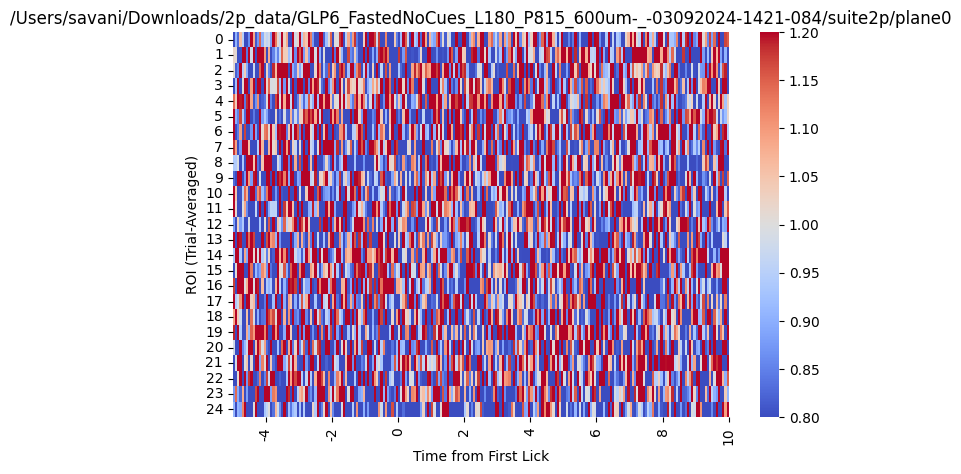

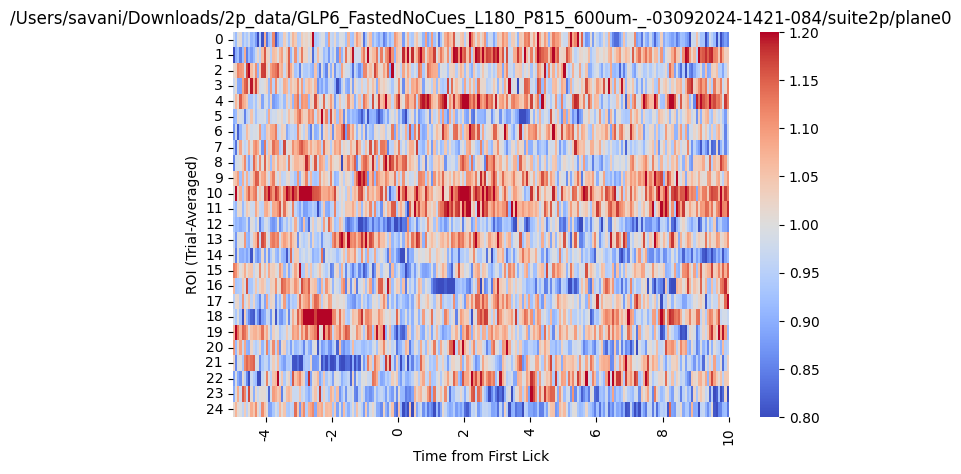

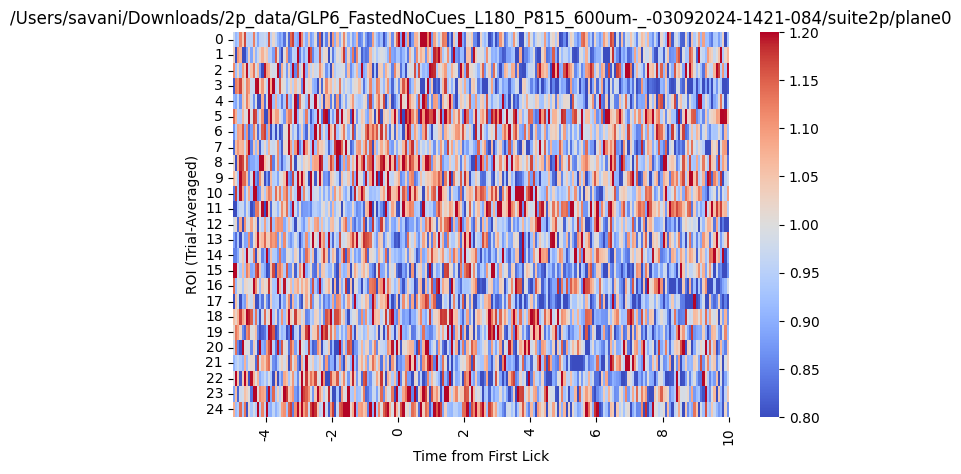

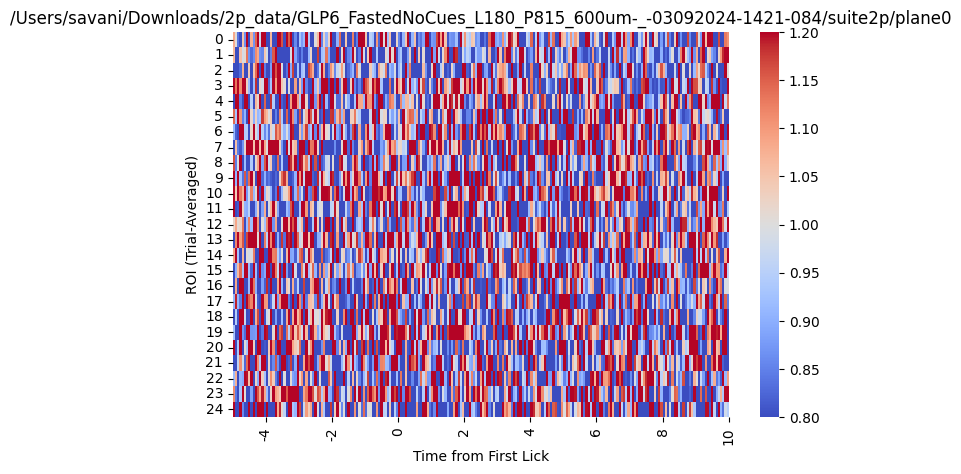

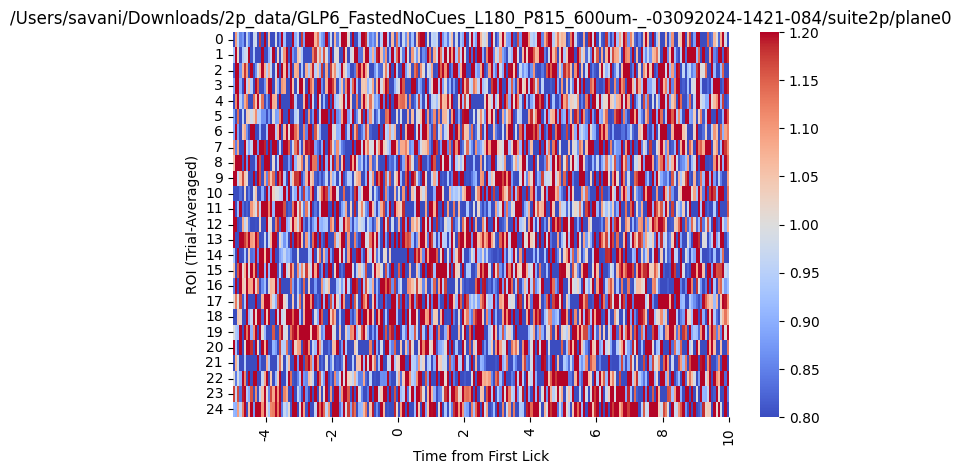

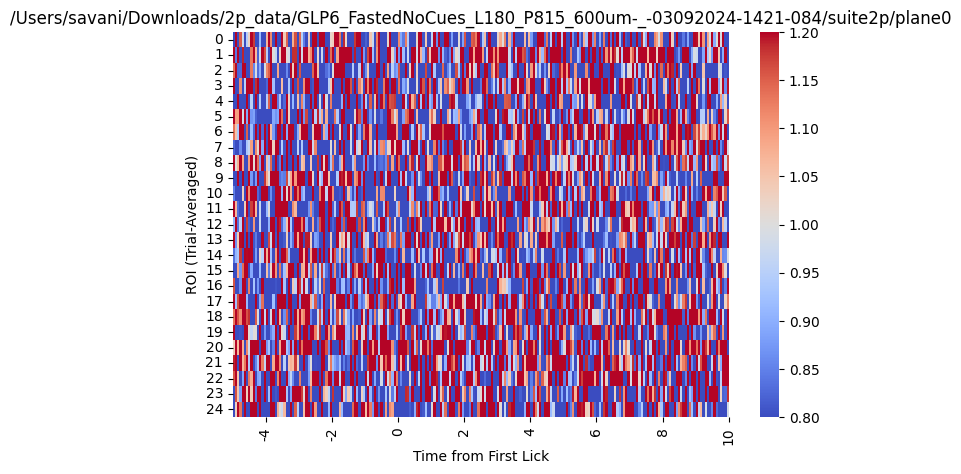

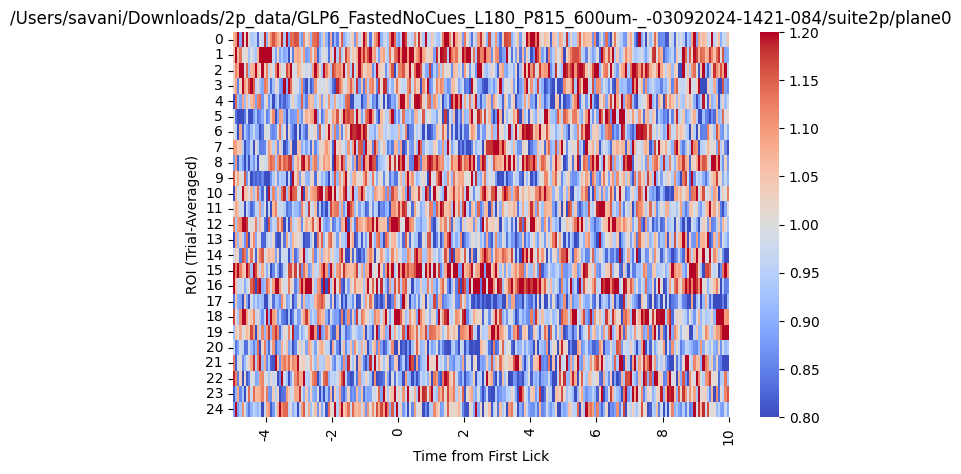

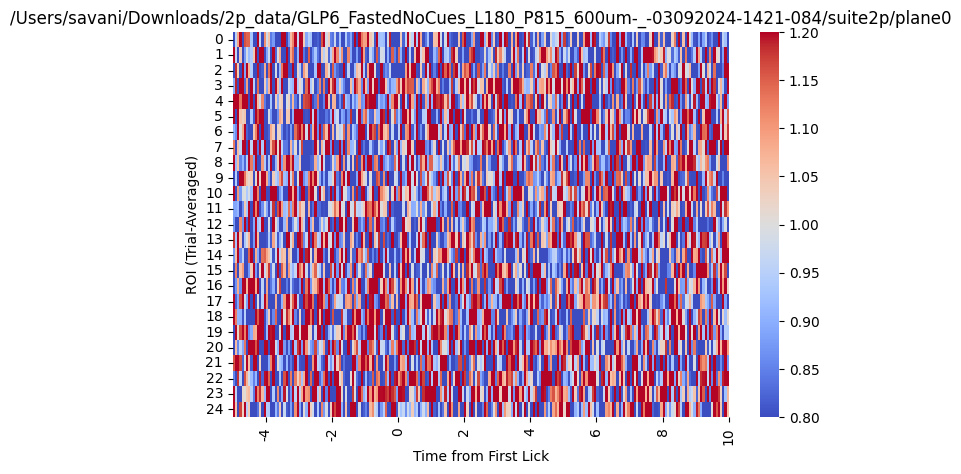

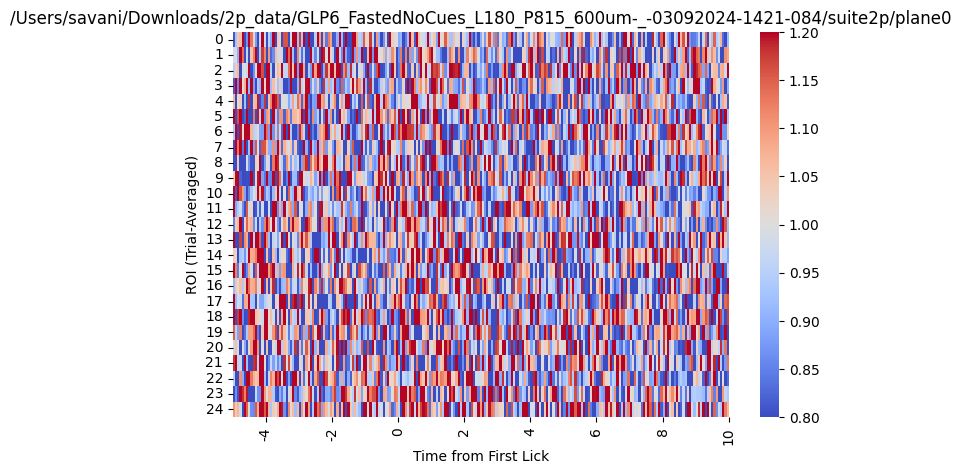

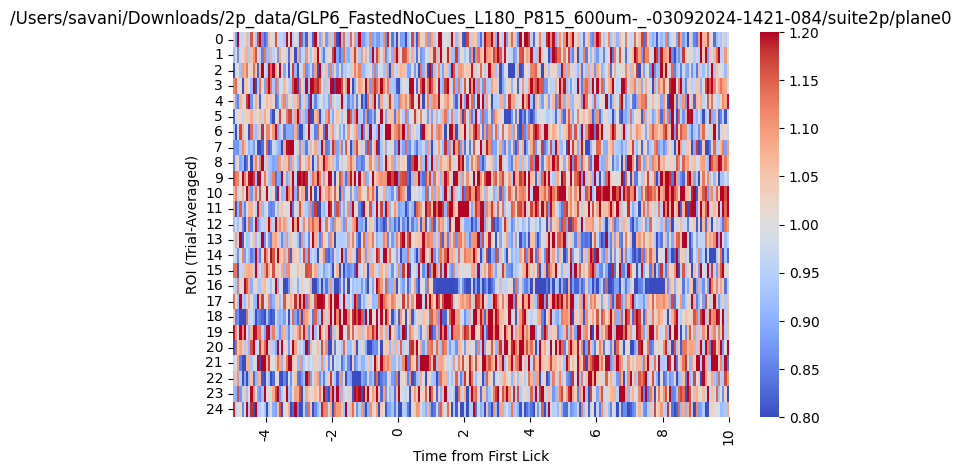

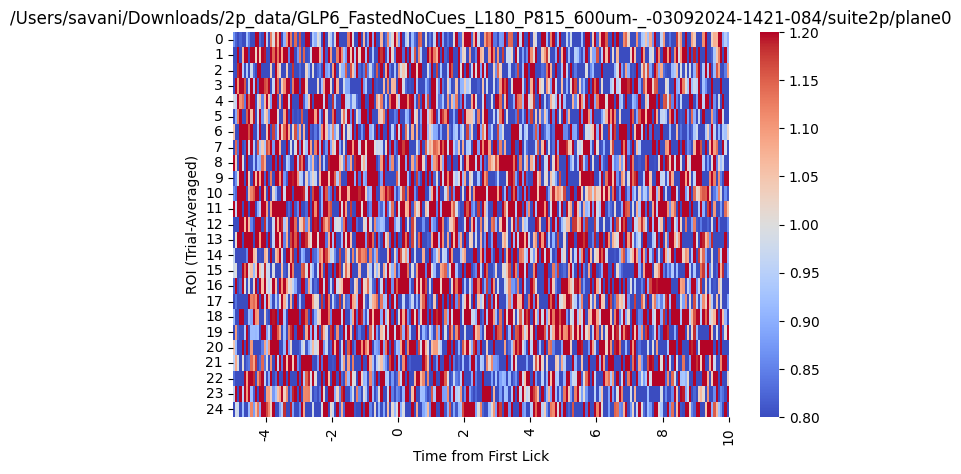

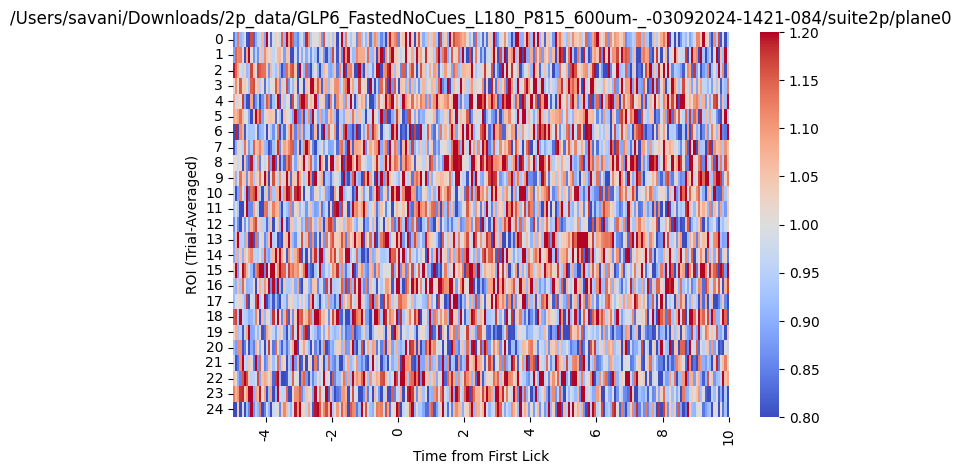

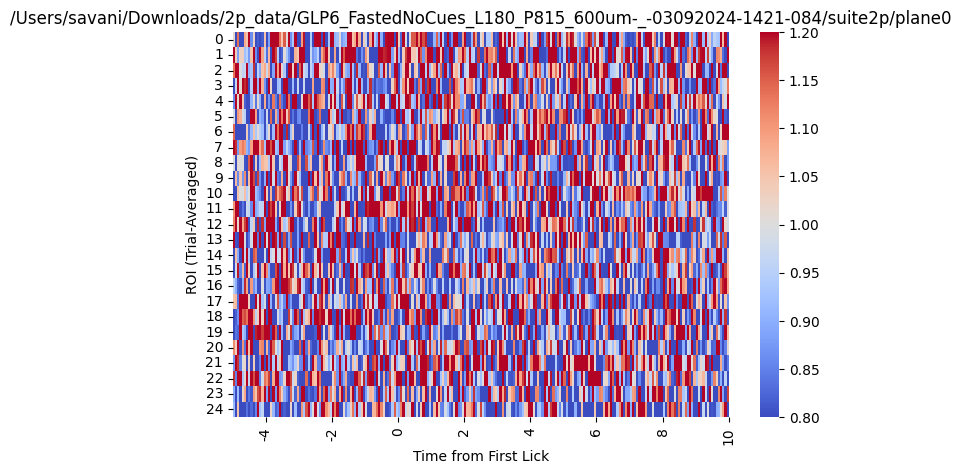

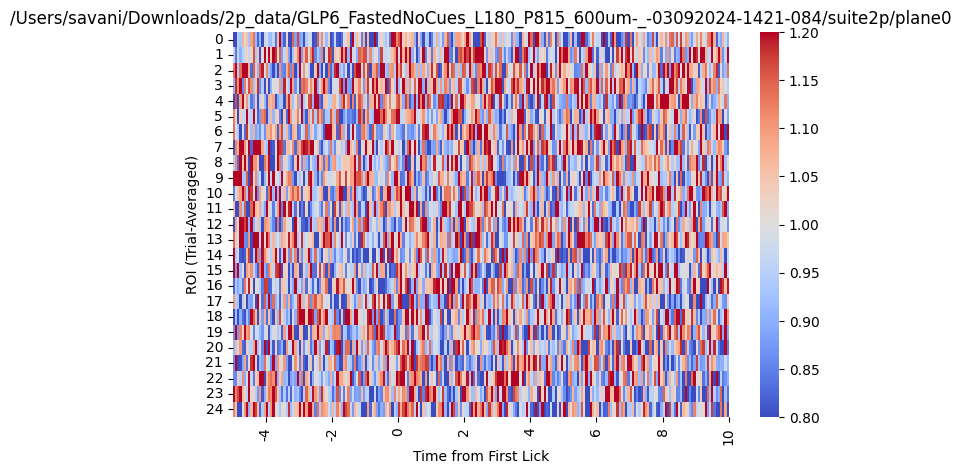

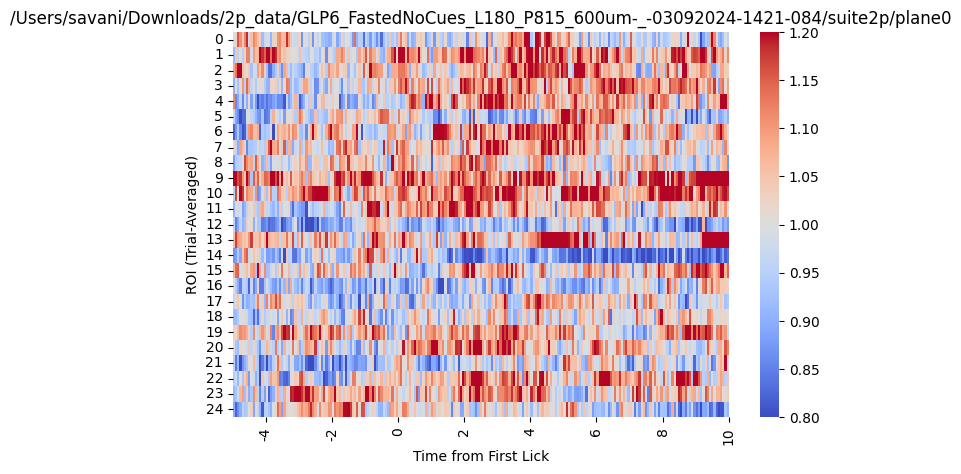

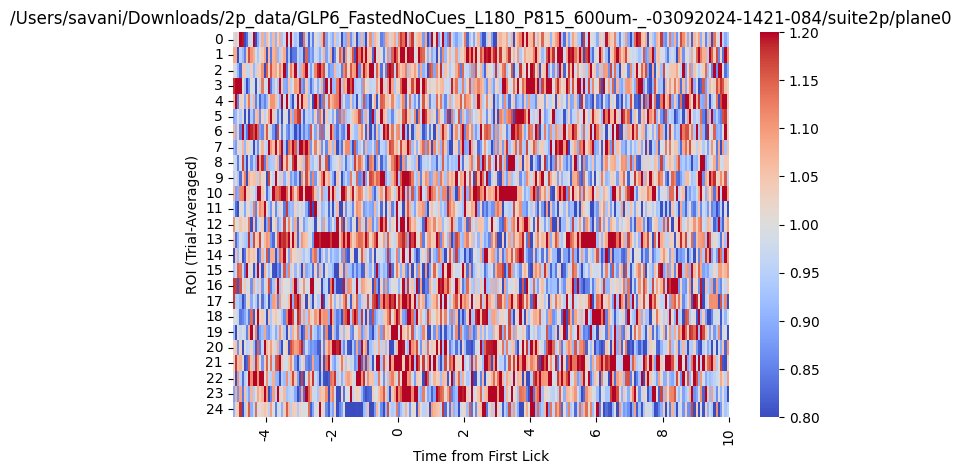

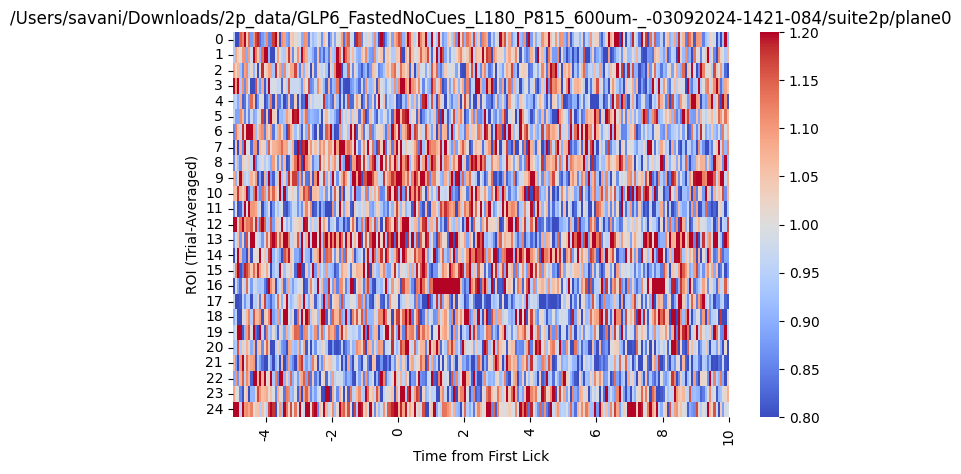

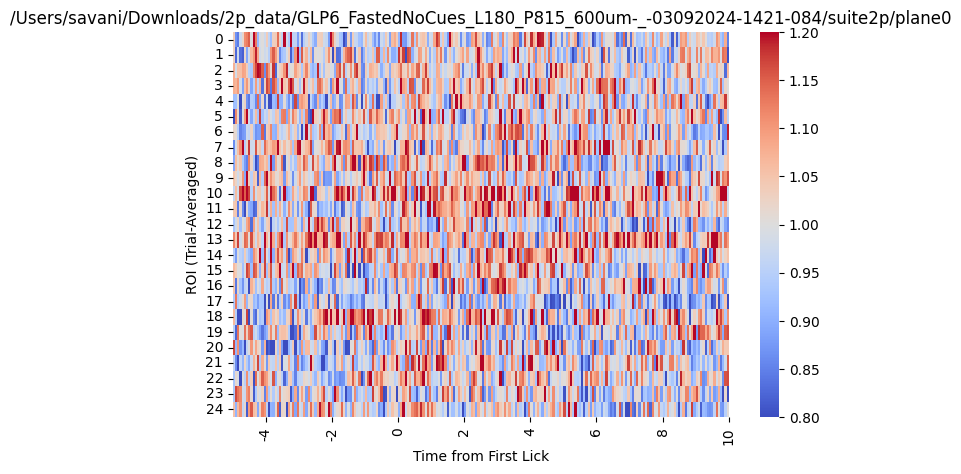

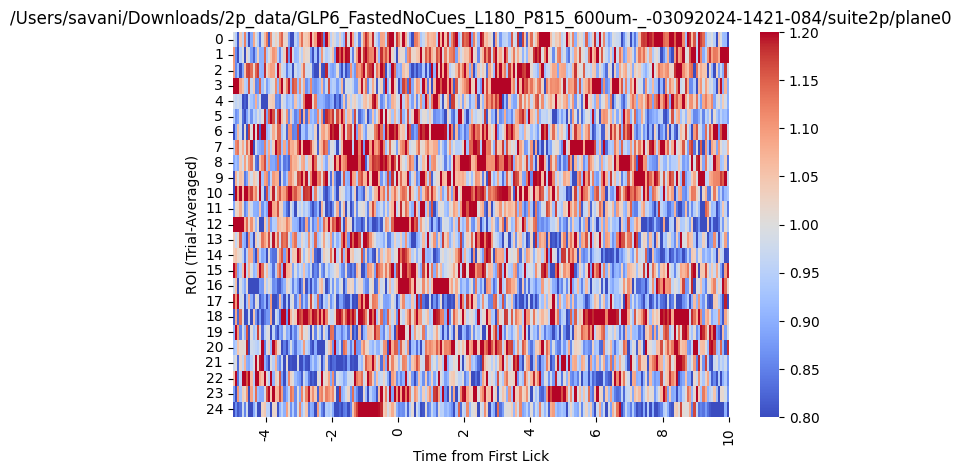

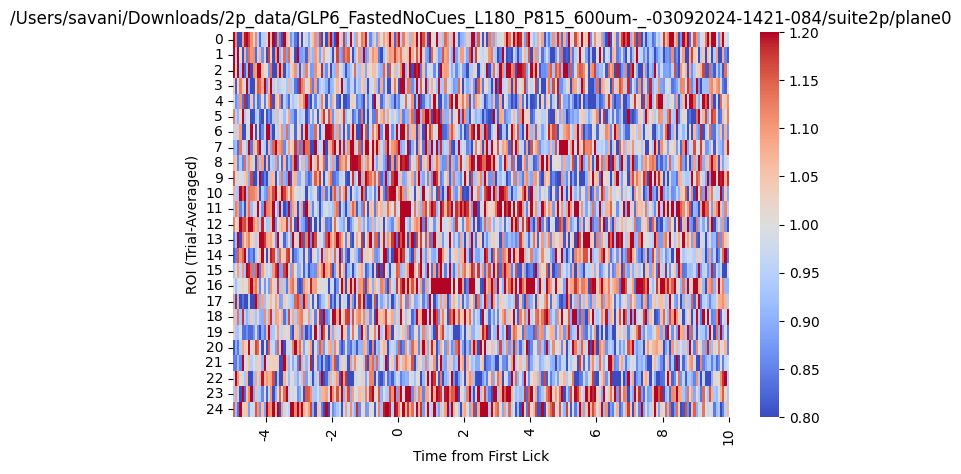

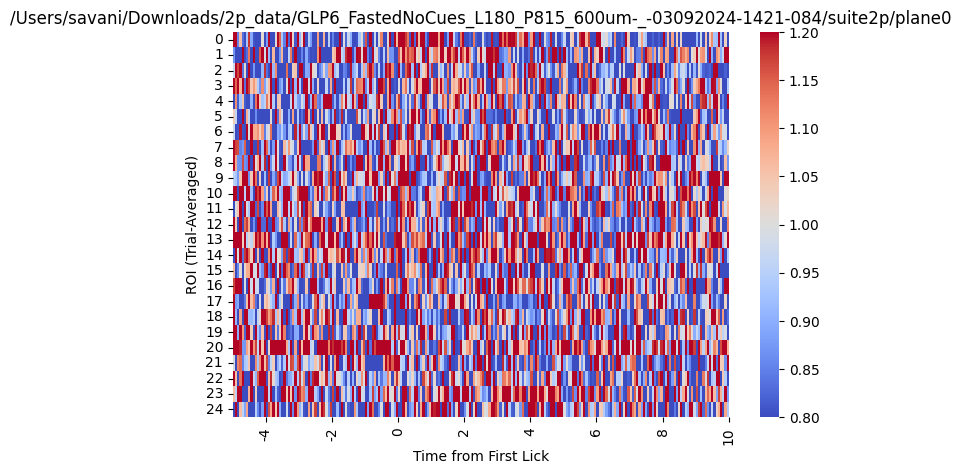

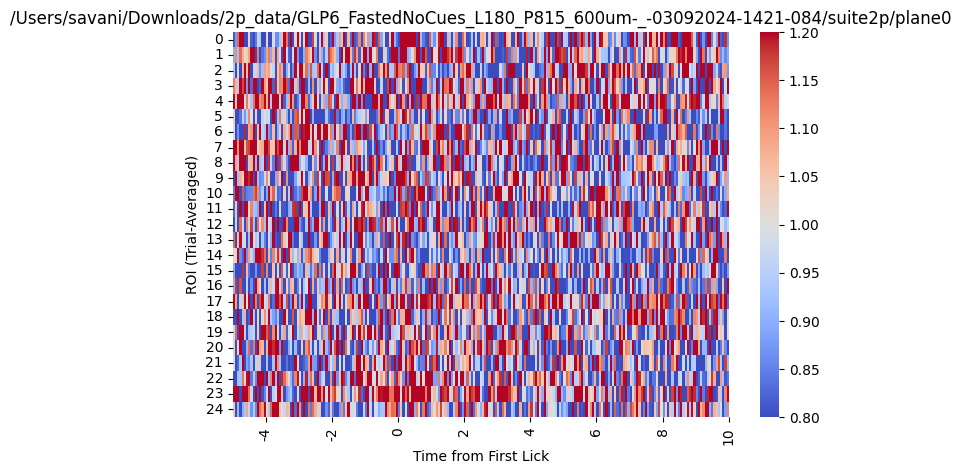

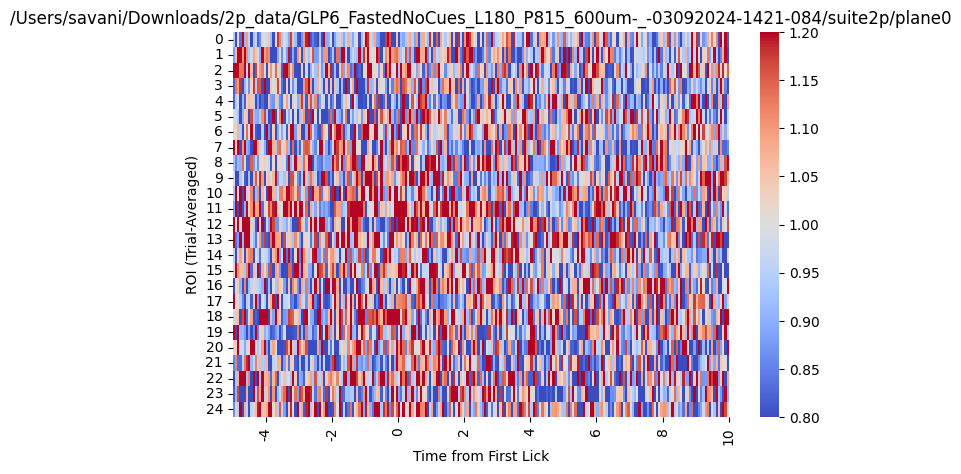

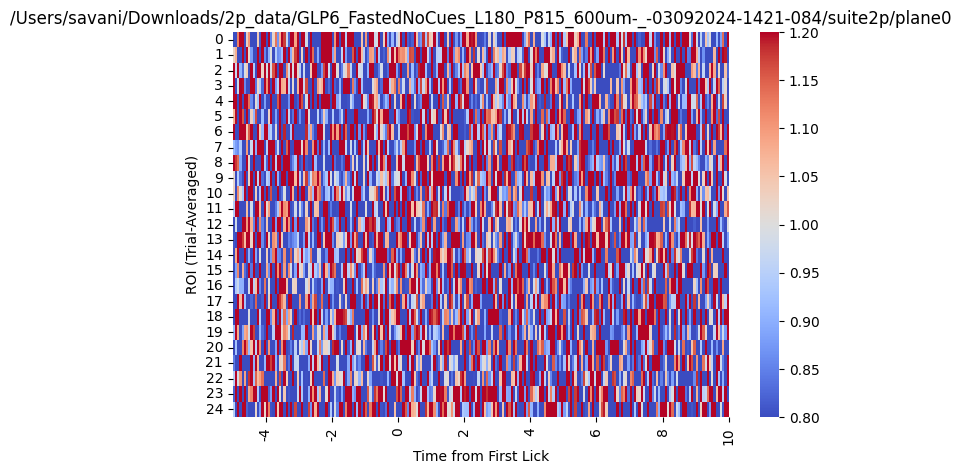

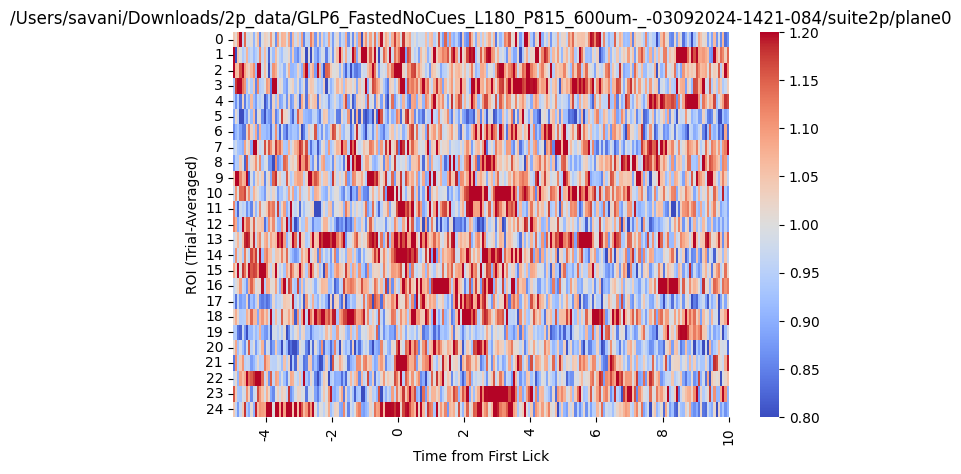

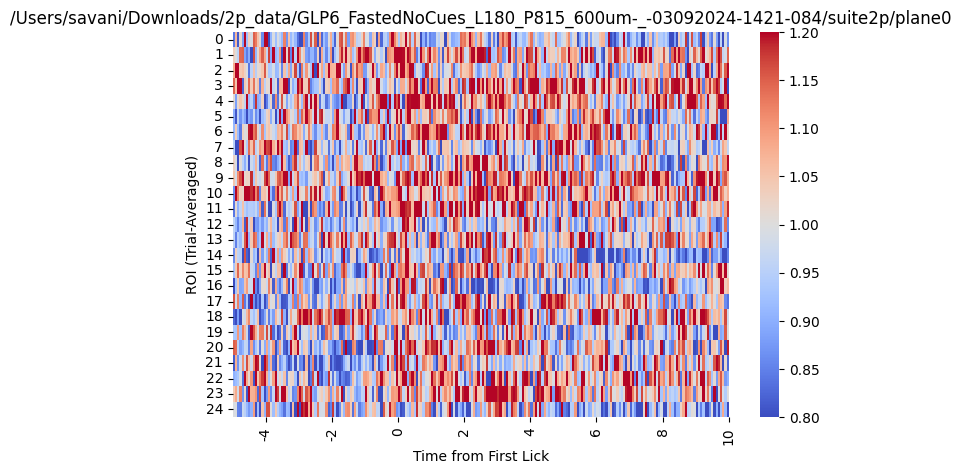

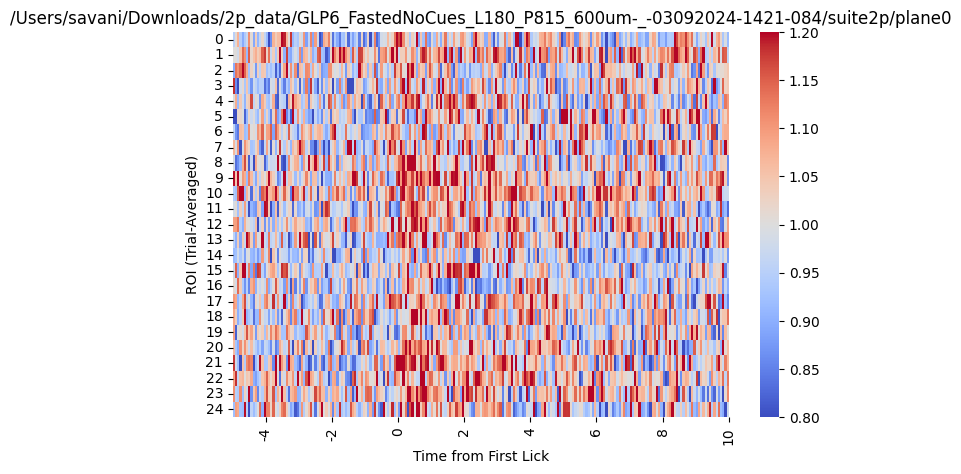

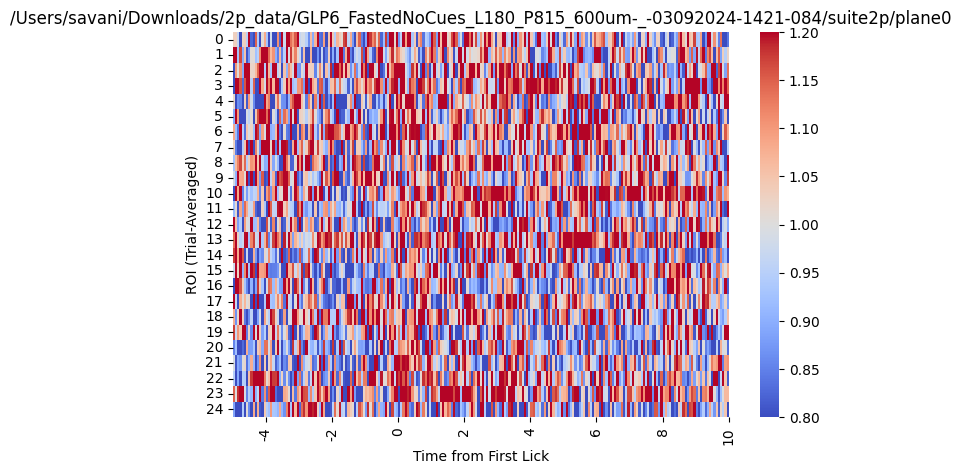

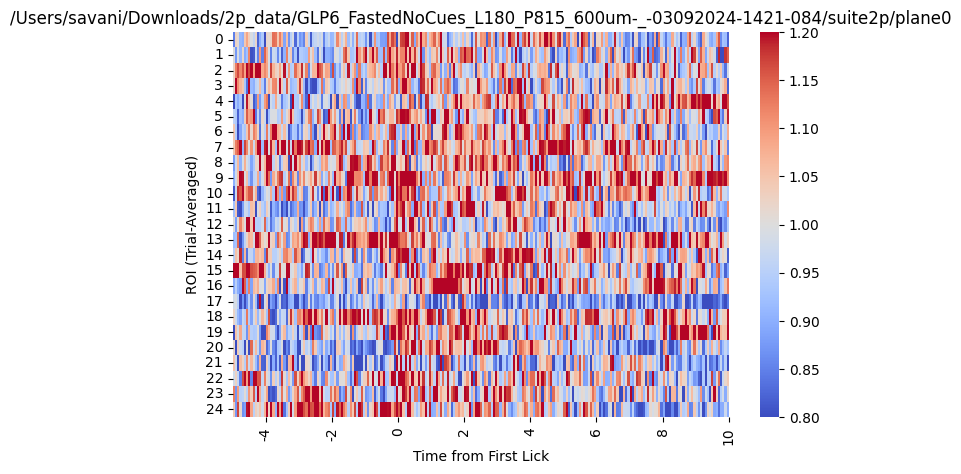

In [280]:
filt_f_ordered = filt_f_aligned[ascending_order,:, :]

for cell in range(filt_f_ordered.shape[0]):
    fig, ax = plt.subplots(1, figsize=(8, 5))
    sns.heatmap(filt_f_ordered[cell, :, :], ax = ax, vmin=0.8, vmax=1.2, cmap='coolwarm')
    ax.set_xticks(np.arange(15, 255, 15)[::2])
    ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
    ax.set_ylabel("ROI (Trial-Averaged)")
    ax.set_xlabel("Time from First Lick")
    ax.set_title(f"{path}")


